In [28]:
import sys
sys.path.append('../')

In [29]:
from scripts.utils import data_path
from scripts.cross_match_scripts import pandas_to_fits, desi_reliable_magnitudes
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import seaborn as sns
%matplotlib inline

# Counterparts and field sources catalogs construction

## Load DESI-CSC 30 arcsec cone search match

In [30]:
desi_csc_orig = pd.read_pickle(data_path+'/csc_allsky_desi_r30_gaia_dered.gz_pkl',compression='gzip')

In [31]:
desi_csc_orig = desi_reliable_magnitudes(desi_csc_orig) #make cuts for SNR of flux + add colors
desi_csc_orig

/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getat

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4
0,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9135,336127,359.993680,0.721193,1,0.264035,0.761373,1.464151,-2.279967,-0.936121,-109.650260,-1274.12740,2924.99000,2268.87720,293.554100,3.076859,0.628511,0.000788,0.000010,23.857758,22.736668,22.052845,NaN,NaN,NaN,NaN,14.279862,36.266293,25.085913,-3.999284,-0.742145,-3.078044,-4.096002,0.0,0.0,0.0,0.0,0.0,0.0,27.164009,9010_336127_9135,23.945846,23.945846,23.857758,22.796006,22.796006,22.736668,22.086035,22.086035,22.052845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.520281e-15,1.121090,1.804913,0.683823,NaN,NaN,NaN,NaN,NaN,NaN
1,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9169,336127,359.994202,0.722597,1,0.994499,2.786103,5.748118,6.166792,6.704570,-0.933517,1110.99740,2478.61230,1837.17550,249.912500,2.884505,0.622227,0.000782,0.000011,22.417845,21.328133,20.567974,20.519806,20.430973,NaN,14.885468,49.511795,119.418724,90.869820,10.473576,5.288656,-0.026110,3.618951,0.0,0.0,0.0,0.0,0.0,0.0,23.070881,9010_336127_9169,22.505989,22.505989,22.417845,21.387507,21.387507,21.328133,20.601186,20.601186,20.567974,20.524852,20.524852,20.519806,17.825852,20.434073,20.434073,20.430973,17.095073,NaN,NaN,NaN,NaN,14.885717,NaN,NaN,NaN,9.894579e-15,1.089712,1.849871,0.760159,0.048168,0.897160,0.088833,NaN,NaN,NaN
2,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9295,336127,359.997367,0.721166,1,0.287270,0.334849,0.528142,-1.608118,0.423848,16.828413,692.35394,2346.16870,1762.25840,213.479600,2.978809,0.614420,0.000778,0.000010,23.765974,23.628395,23.159851,NaN,23.428870,19.434230,15.398930,13.914554,14.056722,7.716652,-2.775487,0.332233,0.469412,2.225948,0.0,0.0,0.0,0.0,0.0,0.0,17.638166,9010_336127_9295,23.854274,23.854274,23.765974,23.687877,23.687877,23.628395,23.193123,23.193123,23.159851,NaN,NaN,NaN,NaN,23.431975,NaN,NaN,NaN,19.434892,NaN,NaN,NaN,15.399180,NaN,NaN,NaN,9.091730e-16,0.137579,0.606123,0.468544,NaN,NaN,NaN,NaN,NaN,NaN
3,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9271,336127,359.996619,0.722544,1,0.195305,0.580013,1.060394,-1.374197,0.465793,55.299458,840.05010,1941.29630,1459.10840,181.554780,2.827259,0.595737,0.000749,0.000010,24.184935,23.031937,22.403067,NaN,23.326414,18.142536,15.188987,8.605151,22.155508,14.287992,-2.310637,0.359518,1.513426,2.704489,0.0,0.0,0.0,0.0,0.0,0.0,15.723989,9010_336127_9271,24.273217,24.273217,24.184935,23.091406,23.091406,23.031937,22.436332,22.436332,22.403067,NaN,NaN,NaN,NaN,23.329518,NaN,NaN,NaN,18.143198,NaN,NaN,NaN,15.189237,NaN,NaN,NaN,1.825409e-15,1.152998,1.781868,0.628870,NaN,NaN,NaN,NaN,NaN,NaN
4,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9360,336127,359.998741,0.722629,1,0.162211,0.722331,4.141845,10.932156,10.346854,281.147600,-6404.08400,1451.76900,1055.47450,125.596010,2.283064,0.530093,0.000696,0.000010,24.386390,22.793606,20.923704,19.898174,19.959871,16.377000,NaN,6.180582,23.467144,46.417503,16.518280,7.533284,7.418694,-20.397125,0.0,0.0,0.0,

In [33]:
csc_cleared = pd.read_pickle(data_path+'csc_cleared.pkl')
s_up = csc_cleared.flux_aper_hilim_s - csc_cleared.flux_aper_s
s_down = csc_cleared.flux_aper_s - csc_cleared.flux_aper_lolim_s
s_err = np.sqrt(s_up ** 2 + s_down ** 2)
m_up = csc_cleared.flux_aper_hilim_m - csc_cleared.flux_aper_m
m_down = csc_cleared.flux_aper_m - csc_cleared.flux_aper_lolim_m
m_err = np.sqrt(m_up ** 2 + m_down ** 2)
csc_cleared['flux_aper_s_err'] = s_err
csc_cleared['flux_aper_m_err'] = m_err

csc_cleared = csc_cleared[['name', 'flux_aper_s', 'flux_aper_s_err', 'flux_aper_m', 'flux_aper_m_err']]
csc_cleared.columns = ['csc_'+x for x in csc_cleared.columns]

hardness = csc_cleared.csc_flux_aper_m / csc_cleared.csc_flux_aper_s
hardness_err = hardness * np.sqrt((csc_cleared.csc_flux_aper_m_err / csc_cleared.csc_flux_aper_m) ** 2 + (csc_cleared.csc_flux_aper_s_err / csc_cleared.csc_flux_aper_s) ** 2)

csc_cleared['csc_hardness'] = hardness
csc_cleared['csc_hardness_err'] = hardness_err

csc_cleared

,csc_name,csc_flux_aper_s,csc_flux_aper_s_err,csc_flux_aper_m,csc_flux_aper_m_err,csc_hardness,csc_hardness_err
0,2CXO J000000.0+004331,9.616027e-16,6.104658e-16,1.664233e-15,8.409077e-16,1.730687,1.404242
2,2CXO J000000.2-501250,NaN,NaN,3.818123e-16,3.206037e-16,NaN,NaN
4,2CXO J000001.0-605019,9.047892e-16,1.279565e-15,6.463688e-16,8.191058e-16,0.714386,1.356563
5,2CXO J000001.4+004822,1.384965e-15,1.468978e-15,1.626135e-15,1.040341e-15,1.174134,1.454361
8,2CXO J000001.7+003824,2.565676e-15,1.106974e-15,2.359721e-15,1.092158e-15,0.919727,0.581954
...,...,...,...,...,...,...,...
317161,2CXO J235959.4-500934,2.708740e-16,2.321659e-16,5.533968e-16,3.148648e-16,2.043004,2.101757
317163,2CXO J235959.4-574903,0.000000e+00,8.451938e-16,NaN,NaN,NaN,NaN
317164,2CXO J235959.5+004302,4.668693e-16,4.154569e-16,3.939044e-16,4.410098e-16,0.843715,1.206646
317165,2CXO J235959.8+622403,1.059863e-15,7.496828e-16,0.000000e+00,1.920638e-16,0.000000,NaN


In [34]:
desi_csc_orig = pd.merge(desi_csc_orig, csc_cleared, on='csc_name')

### Primary filters and DESI duplicates (ra,dec) removal

In [35]:
#step 1: filter brick ID
#next sort by name_csc, ra, dec and flux_g, with flux_g from largest to smallest
desi_csc = desi_csc_orig.query('csc_flux_05_2 >= 3e-15')
desi_csc = desi_csc.query('brick_primary == True')
print('desi reliable catalog:', len(desi_csc))
desi_csc = desi_csc.sort_values(by=['csc_name', 'csc_ra', 'csc_dec', 'flux_g'], ascending=[True, True, True, False])

#step 2: remove duplicates in ['ra_csc', 'dec_csc', 'ra', 'dec'] and keep the one with the highest flux_g 
desi_csc = desi_csc.drop_duplicates(subset=['csc_ra', 'csc_dec', 'ra', 'dec'], keep='first')

print('desi reliable catalog after non-primary brick and duplicates removal:', len(desi_csc))
print('number of csc sources after filtering', desi_csc.csc_name.nunique())
#sort by sep_csc so that the closest objects are first
desi_csc.sort_values(by=['csc_name', 'dist_arcsec'], inplace=True)
desi_csc.sample(10)

desi reliable catalog: 1384805
desi reliable catalog after non-primary brick and duplicates removal: 1384801
number of csc sources after filtering 60672


,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,csc_flux_aper_s,csc_flux_aper_s_err,csc_flux_aper_m,csc_flux_aper_m_err,csc_hardness,csc_hardness_err
2753086,2CXO J171500.1+595611,258.750453,59.936401,3.430585e-14,2.192353,6.132340,9011,1661,617652,258.746029,59.932220,1,0.649232,1.203329,1.698690,1.935848,-0.494850,-10.707381,-192.77270,306.339840,92.407260,18.196423,7.527823,2.301829,0.006222,0.000068,22.907326,22.257494,21.901476,21.779291,NaN,NaN,NaN,11.363226,11.567446,7.246147,5.311363,-0.750776,-0.844575,-1.595180,0.0,0.0,0.0,0.0,0.0,0.0,17.035859,9011_617652_1661,22.969000,22.969000,22.907326,22.299039,22.299039,22.257494,21.924715,21.924715,21.901476,21.782822,21.782822,21.779291,19.083822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.897320e-15,0.649832,1.005850,0.356018,0.122185,NaN,NaN,NaN,NaN,NaN,2.067755e-14,4.918816e-15,1.362830e-14,3.008880e-15,0.659087,0.213906
1383089,2CXO J092905.2+380411,142.271872,38.069948,2.460543e-14,1.367614,3.825420,9011,2774,534447,142.277999,38.067166,1,0.171985,0.349987,0.572808,1.697725,3.436071,44.561270,-342.58484,417.267100,141.434190,119.109310,3.590368,0.806933,0.000957,0.000013,24.365124,23.608782,23.087587,21.922690,21.158222,18.377260,NaN,3.513160,4.162260,6.251470,3.216894,3.086603,1.378774,-1.236697,0.0,0.0,0.0,0.0,0.0,0.0,20.045218,9011_534447_2774,24.411274,NaN,NaN,23.639870,23.639870,23.608782,23.104977,23.104977,23.087587,21.925332,NaN,NaN,NaN,21.159845,NaN,NaN,NaN,18.377606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.717446e-16,NaN,NaN,0.521195,NaN,NaN,NaN,NaN,NaN,NaN,9.958130e-15,7.229138e-15,1.464730e-14,7.457186e-15,1.470888,1.304213
729070,2CXO J033106.6-522926,52.777720,-52.490564,2.046242e-14,0.680925,1.904649,9010,273,68465,52.774116,-52.494969,1,0.074795,0.087123,-0.002956,-1.123246,-1.851799,15.348156,-1204.76120,4920.060000,3210.320000,361.010900,5.734944,1.489679,0.002652,0.000031,25.265490,25.116102,NaN,NaN,NaN,19.534485,NaN,5.246332,4.936353,-0.056156,-2.689920,-2.260166,0.790442,-6.690613,0.0,0.0,0.0,0.0,0.0,0.0,17.717579,9010_68465_273,25.315319,25.315319,25.265490,25.149668,25.149668,25.116102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.534859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.341347e-14,3.690022e-15,7.048943e-15,2.378391e-15,0.525512,0.228779
2606145,2CXO J154311.0+662523,235.796076,66.423172,7.042497e-15,0.466487,1.304833,9011,1959,634526,235.793325,66.415644,1,0.082833,0.282086,0.832368,3.372083,3.658767,13.617192,-76.68273,579.951800,131.059920,87.922670,7.404438,2.298678,0.004059,0.000047,25.109007,23.809727,22.663235,21.174788,21.088306,19.664064,NaN,1.994808,3.229365,7.804875,9.175808,5.547201,0.867589,-0.524935,0.0,0.0,0.0,0.0,0.0,0.0,27.389047,9011_634526_1959,25.204492,NaN,NaN,23.874046,NaN,NaN,22.699212,22.699212,22.663235,21.180254,21.180254,21.174788,18.481254,21.091663,21.091663,21.088306,17.752663,19.664781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436458e-15,NaN,NaN,NaN,1.488447,NaN,0.086482,NaN,NaN,NaN,2.224438e-15,1.079892e-15,4.818059e-15,1.578799e-15,2.165967,1.268626
2380819,2CXO J142505.3+375517,216.272298,37.921631,3.255993e-15,1.192662,3.336053,901

# Calculating desi-sources around each source

In [36]:
def annuli_area_deg2(r_in_arcsec, r_out_arcsec):
    r_in_deg = r_in_arcsec/3600
    r_out_deg = r_out_arcsec/3600
    area = np.pi*(r_out_deg**2 - r_in_deg**2)
    return area

csc = pd.DataFrame(desi_csc.groupby(by = 'csc_name', ).agg({'csc_ra': np.mean, 'csc_dec': np.mean}))
smallest_sep  = desi_csc.groupby('csc_name')['dist_arcsec'].min()
csc['smallest_sep'] = smallest_sep

csc.reset_index(inplace=True)
desi_csc = desi_csc.merge(csc[['csc_name','smallest_sep']], on='csc_name')

is_hostless = desi_csc.eval('smallest_sep > 2*csc_r_98')
desi_csc['is_hostless'] = is_hostless
hostless_df = desi_csc[is_hostless][['csc_name', 'csc_ra', 'csc_dec', 'csc_flux_05_2', 'csc_flux_aper_s', 'csc_flux_aper_s_err', 'csc_flux_aper_m', 'csc_flux_aper_m_err',  'csc_hardness', 'csc_hardness_err', 'csc_r_98', 'smallest_sep']].drop_duplicates(subset=['csc_ra', 'csc_dec'], keep='first')
desi_csc = desi_csc[~is_hostless]

desi_csc_x_ray_only = desi_csc.drop_duplicates(subset=['csc_name', 'csc_ra', 'csc_dec'], keep='first')

desi_csc.sample(10)

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,csc_flux_aper_s,csc_flux_aper_s_err,csc_flux_aper_m,csc_flux_aper_m_err,csc_hardness,csc_hardness_err,smallest_sep,is_hostless
973350,2CXO J141104.1+521755,212.767300,52.298739,1.313116e-14,0.447479,1.251666,9011,2481,592597,212.779313,52.302385,1,1.791725,4.905261,9.315241,17.603840,12.055744,46.929190,139.61295,268.59448,91.30498,25.638418,4.446256,1.280733,0.002054,0.000026,21.812857,20.736992,20.056680,19.382893,19.795118,18.320988,17.137533,29.364323,46.871555,47.167156,37.119717,13.643422,2.126924,0.710269,0.0,0.0,0.0,0.0,0.0,0.0,29.523331,9011_592597_2481,21.866822,21.866822,21.812857,20.773345,20.773345,20.736992,20.077015,20.077015,20.056680,19.385981,19.385981,19.382893,16.686981,19.797015,19.797015,19.795118,16.458015,18.321392,NaN,NaN,NaN,17.137686,NaN,NaN,NaN,1.584583e-14,1.075865,1.756177,0.680312,0.673787,0.941874,-0.412225,NaN,NaN,NaN,7.877885e-15,1.329112e-15,5.253275e-15,8.779040e-16,0.666838,0.158354,0.119856,False
371730,2CXO J042711.0-594952,66.796076,-59.831150,3.031654e-15,1.318958,3.689323,9010,5062,45179,66.790088,-59.838188,1,0.069202,0.184791,0.209818,1.128163,0.289704,39.943974,-218.65146,5199.99760,3063.84600,330.081020,8.457885,2.549674,0.006021,0.000070,25.341620,24.294174,24.173512,22.365746,23.843071,18.495935,NaN,4.990240,10.228548,3.811993,3.280973,0.462591,3.099330,-1.827781,0.0,0.0,0.0,0.0,0.0,0.0,27.555949,9010_45179_5062,25.399703,25.399703,25.341620,24.333298,24.333298,24.294174,24.195393,NaN,NaN,22.369070,NaN,NaN,NaN,23.845114,NaN,NaN,NaN,18.496372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.047446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,7.248125e-15,3.031654e-15,3.258429e-15,inf,inf,2.122431,False
153274,2CXO J013752.7-125204,24.469996,-12.867922,5.331225e-15,0.477476,1.335572,9010,5479,257583,24.473875,-12.874258,1,0.567265,0.831238,1.969131,2.603331,0.031927,170.813260,4543.95950,1524.92480,702.95760,87.315370,2.938991,0.588733,0.000749,0.000010,23.047535,22.654880,21.738693,21.457283,26.237210,16.918186,13.356221,22.151873,22.038910,18.400090,4.463017,0.024497,4.675961,14.134481,0.0,0.0,0.0,0.0,0.0,0.0,26.562896,9010_257583_5479,23.115535,23.115535,23.047535,22.700687,22.700687,22.654880,21.764313,21.764313,21.738693,21.461177,21.461177,21.457283,18.762177,26.239605,NaN,NaN,NaN,16.918696,16.918696,16.918186,11.744696,13.356414,13.356414,13.356221,6.736414,3.365966e-15,0.392655,1.308842,0.916187,0.281410,NaN,NaN,4.820507,9.298659,3.561965,3.430780e-15,1.291812e-15,1.900445e-15,7.842136e-16,0.553940,0.309442,0.504935,False
101638,2CXO J010051.4-002110,15.214415,-0.352885,3.549394e-15,0.881007,2.464308,9010,7809,328988,15.215736,-0.351071,1,0.164416,0.266746,0.594031,1.805215,2.344590,77.021160,3728.15940,3308.66940,2184.92480,261.270720,2.635944,0.546883,0.000573,0.000008,24.354122,23.863342,23.025530,21.852608,21.571106,17.782680,13.570964,9.457376,12.468538,9.601848,2.930872,1.733861,1.843709,10.424283,0.0,0.0,0.0,0.0,0.0,0.0,8.077901,9010_328988_7809,24.460140,24.460140,24.354122,23.934755,23.934755,23.863342,23.065477,23.065477,23.025530,21.858678,NaN,NaN,NaN,21.574833,NaN,NaN,NaN,

flux lim: 3e-15
	 number of hostless x-ray sources with flux > 3e-15: 3769
	 number of not hostless x-ray sources with flux > 3e-15: 56903
	 fraction of hostless x-ray sources with flux > 3e-15: 0.062120912447257384
	 hostless x-ray hardness mean+-std: 1.30+-1.12
	 not hostless x-ray hardness mean+-std: 0.81+-0.56
flux lim: 1e-14
	 number of hostless x-ray sources with flux > 1e-14: 606
	 number of not hostless x-ray sources with flux > 1e-14: 22818
	 fraction of hostless x-ray sources with flux > 1e-14: 0.025870901639344263
	 hostless x-ray hardness mean+-std: 1.32+-1.32
	 not hostless x-ray hardness mean+-std: 0.77+-0.56


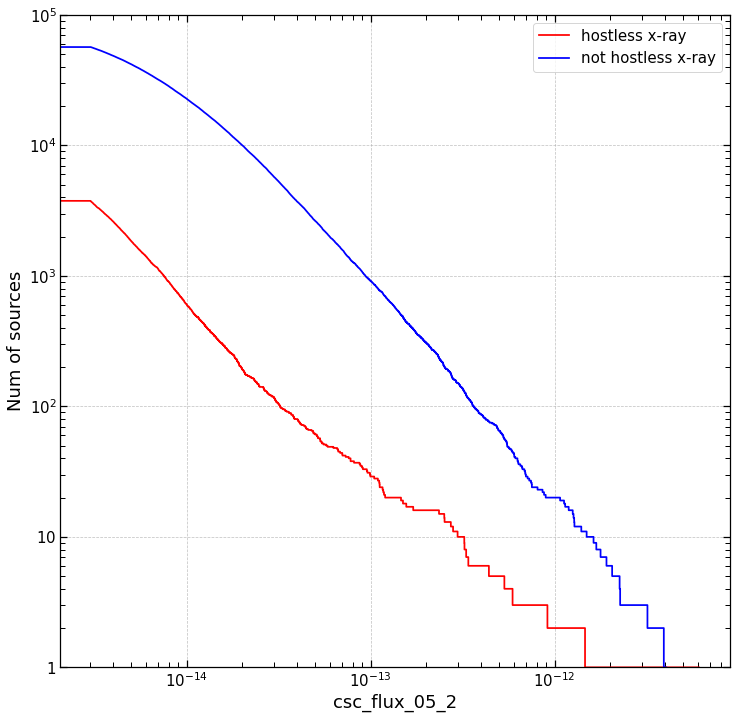

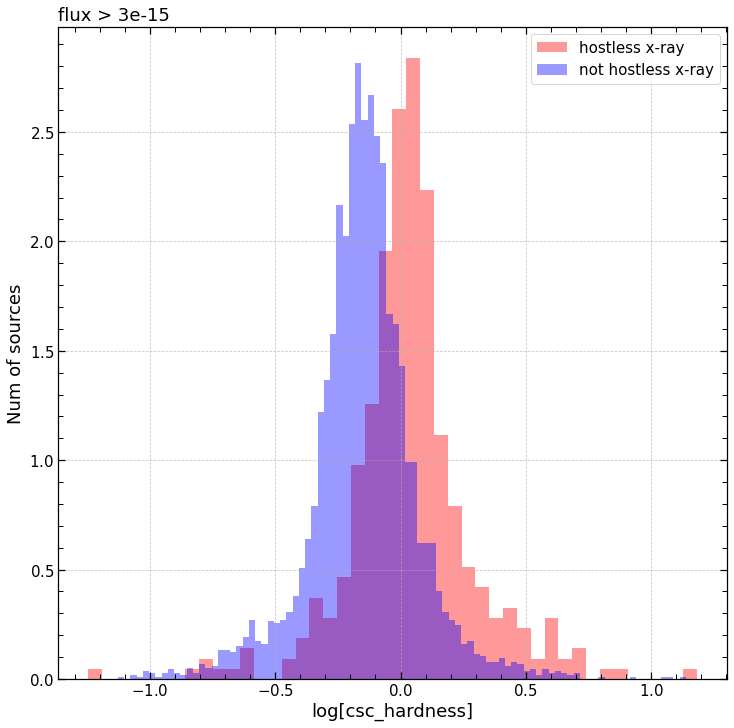

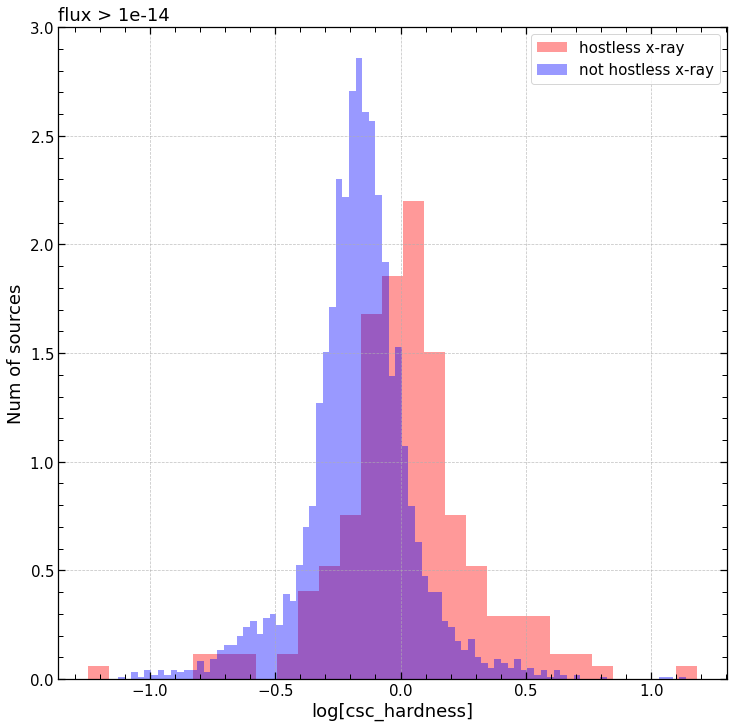

In [58]:
fig,  ax =  plt.subplots( figsize = (12,12))
sns.ecdfplot(hostless_df['csc_flux_05_2'], label='hostless x-ray', complementary=True, stat = 'count' , color='red', ax = ax)
sns.ecdfplot(desi_csc_x_ray_only['csc_flux_05_2'], label='not hostless x-ray', complementary=True, stat = 'count' , color='blue', ax = ax)
ax.set(xscale='log', yscale='log', xlabel='csc_flux_05_2', ylabel='Num of sources', ylim = [1,1e5])
ax.legend()

for fluxlim in [3e-15, 1e-14]:
    print('flux lim:', fluxlim)
    n_hostless_flux_lim = hostless_df.query('csc_flux_05_2 > @fluxlim').shape[0]
    n_not_hostless_flux_lim = desi_csc_x_ray_only.query('csc_flux_05_2 > @fluxlim').shape[0]
    print(f'\t number of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim)
    print(f'\t number of not hostless x-ray sources with flux > {fluxlim}:', n_not_hostless_flux_lim)
    print(f'\t fraction of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim/(n_not_hostless_flux_lim + n_hostless_flux_lim))

    hardness_hostless = hostless_df.query('csc_flux_05_2 > @fluxlim & csc_hardness/csc_hardness_err>3').csc_hardness
    hardness_not_hostless = desi_csc_x_ray_only.query('csc_flux_05_2 > @fluxlim & csc_hardness/csc_hardness_err>3').csc_hardness
    fig,  ax =  plt.subplots( figsize = (12,12))
    ax.hist(np.log10(hardness_hostless), label='hostless x-ray', color='red', density=True, alpha = 0.4)
    ax.hist(np.log10(hardness_not_hostless), label='not hostless x-ray', color='blue', density=True, alpha = 0.4)
    ax.set(xlabel='log[csc_hardness]', ylabel='Num of sources')
    ax.set_title(f'flux > {fluxlim}')

    print(f"\t hostless x-ray hardness mean+-std: {np.mean(hardness_hostless):.2f}+-{np.std(hardness_hostless):.2f}")
    print(f"\t not hostless x-ray hardness mean+-std: {np.mean(hardness_not_hostless):.2f}+-{np.std(hardness_not_hostless):.2f}")

    ax.legend()



flux lim: 3e-15
number of hostless x-ray sources with flux > 3e-15: 43
number of not hostless x-ray sources with flux > 3e-15: 611
fraction of hostless x-ray sources with flux > 3e-15: 0.06574923547400612
flux lim: 1e-14
number of hostless x-ray sources with flux > 1e-14: 3
number of not hostless x-ray sources with flux > 1e-14: 245
fraction of hostless x-ray sources with flux > 1e-14: 0.012096774193548387


,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_flux_aper_s,csc_flux_aper_s_err,csc_flux_aper_m,csc_flux_aper_m_err,csc_hardness,csc_hardness_err,csc_r_98,smallest_sep
684653,2CXO J105332.6+574316,163.385898,57.721310,6.103572e-15,3.228069e-15,2.771716e-15,2.875503e-15,2.383854e-15,0.890781,1.063177,5.295619,11.498189
659027,2CXO J103302.7+580240,158.261655,58.044693,5.264955e-15,1.275360e-15,9.492796e-16,3.989595e-15,1.307325e-15,3.128212,2.544052,2.090497,6.516825
677371,2CXO J104820.3+585046,162.084648,58.846315,5.706880e-15,2.452621e-15,8.558830e-16,3.254259e-15,8.890647e-16,1.326850,0.588045,1.167484,5.596732
676817,2CXO J104807.4+591251,162.031014,59.214196,3.022962e-15,1.570869e-15,8.160775e-16,1.452092e-15,6.019081e-16,0.924388,0.614358,2.394512,11.019864
657207,2CXO J103121.9+573134,157.841331,57.526115,3.862979e-15,2.735819e-15,1.403985e-15,1.127161e-15,6.704685e-16,0.412001,0.323672,2.331750,8.192553


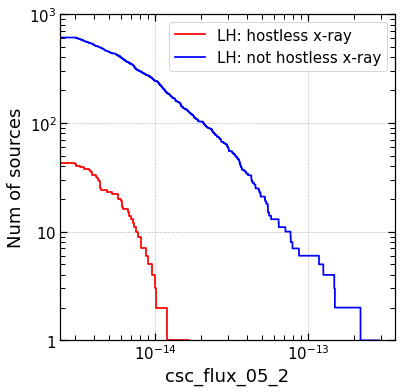

In [59]:
ra_min = 154.763934
ra_max = 167.084550
dec_min = 54.124219
dec_max = 61.236185

hostless_df_lh = hostless_df.query('csc_ra>=@ra_min & csc_ra<=@ra_max & csc_dec>=@dec_min & csc_dec<=@dec_max')
desi_csc_x_ray_only_lh = desi_csc_x_ray_only.query('csc_ra>=@ra_min & csc_ra<=@ra_max & csc_dec>=@dec_min & csc_dec<=@dec_max')

fig,  ax =  plt.subplots( figsize = (6,6))
sns.ecdfplot(hostless_df_lh['csc_flux_05_2'], label='LH: hostless x-ray', complementary=True, stat = 'count' , color='red', ax = ax)
sns.ecdfplot(desi_csc_x_ray_only_lh['csc_flux_05_2'], label='LH: not hostless x-ray', complementary=True, stat = 'count' , color='blue', ax = ax)
ax.set(xscale='log', yscale='log', xlabel='csc_flux_05_2', ylabel='Num of sources', ylim = [1,1e3])
ax.legend()


for fluxlim in [3e-15, 1e-14]:
    print('flux lim:', fluxlim)
    n_hostless_flux_lim = hostless_df_lh.query('csc_flux_05_2 > @fluxlim').shape[0]
    n_not_hostless_flux_lim = desi_csc_x_ray_only_lh.query('csc_flux_05_2 > @fluxlim').shape[0]
    print(f'number of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim)
    print(f'number of not hostless x-ray sources with flux > {fluxlim}:', n_not_hostless_flux_lim)
    print(f'fraction of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim/(n_not_hostless_flux_lim + n_hostless_flux_lim))

hostless_df_lh.sample(5)

In [9]:
erosita_orig_df = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14.pkl')

from scripts.cross_match_scripts import search_around_r_data_frames, cross_match_data_frames
ero_hostless = cross_match_data_frames(erosita_orig_df, hostless_df_lh, 'RA_fin', 'DEC_fin', 'csc_ra', 'csc_dec', match_radius = 30)
ero_hostless = ero_hostless.query('matched_sep < 1.5*pos_r98')
ero_hostless['flux_rat'] = ero_hostless['flux_05-20']/ero_hostless['matched_csc_flux_05_2']
ero_hostless[['srcname_fin', 'pos_r98', 'flux_05-20', 'matched_sep', 'matched_csc_name', 'matched_csc_flux_05_2','matched_csc_r_98','flux_rat']]


cross-match radius 30 arcsec
total matches: 22 out of 9215 x 57


,srcname_fin,pos_r98,flux_05-20,matched_sep,matched_csc_name,matched_csc_flux_05_2,matched_csc_r_98,flux_rat
2,SRGe J104522.1+555738,5.399608,2.008208e-14,3.681071,2CXO J104521.9+555734,4.442071e-15,1.179337,4.520883
3,SRGe J103220.4+573211,5.714911,9.351694e-15,1.421180,2CXO J103220.2+573211,4.852860e-15,1.498974,1.927048
4,SRGe J103239.4+574033,6.556224,8.782485e-15,2.364492,2CXO J103239.3+574035,8.115216e-15,1.199912,1.082224
6,SRGe J104453.1+585450,8.352394,6.555353e-15,3.940594,2CXO J104453.0+585453,6.011270e-15,1.327232,1.090510
7,SRGe J104707.4+591249,5.657161,6.344795e-15,1.199593,2CXO J104707.2+591249,6.510092e-15,1.836295,0.974609
8,SRGe J103302.4+580241,6.663467,6.085609e-15,3.061539,2CXO J103302.7+580240,5.264955e-15,2.090497,1.155871
9,SRGe J105118.0+552353,10.753160,6.044226e-15,2.045384,2CXO J105117.8+552354,3.740731e-15,2.010836,1.615787
10,SRGe J105458.3+574348,8.629343,5.335599e-15,3.784660,2CXO J105458.4+574344,5.070014e-15,1.696523,1.052383
11,SRGe J104854.4+573926,8.499000,5.270004e-15,8.777265,2CXO J104853.5+573920,7.151569e-15,2.009572,0.736902
12,SRGe J104544.5+585020,6.675908,5.020989e-15,2.557606,2CXO J104544.2+585019,4.130239e-15,2.049579,1.215666


# Chandra hostless spectra

In [25]:
desi_csc_orig.query('csc_name == "2CXO J103220.2+573211"').sort_values(by = 'dist_arcsec')

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4
1584567,2CXO J103220.2+573211,158.084192,57.536421,4.852860e-15,0.535893,1.498974,9011,2890,609939,158.088107,57.538123,1,0.317879,0.397066,0.568346,1.197148,-3.614838,13.368994,-14.143246,464.55115,157.504470,168.189590,4.803524,1.168578,0.001513,0.000018,23.728088,23.491892,23.107342,22.303700,NaN,19.684631,NaN,6.851381,4.983204,7.370759,2.623783,-3.907668,0.520089,-0.059815,0.0,0.0,0.0,0.0,0.0,0.0,9.735829,9011_609939_2890,23.744345,23.744345,23.728088,23.502843,23.502843,23.491892,23.113468,23.113468,23.107342,22.304630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.684753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.542236e-16,0.236196,0.620746,0.384550,NaN,NaN,NaN,NaN,NaN,NaN
1584574,2CXO J103220.2+573211,158.084192,57.536421,4.852860e-15,0.535893,1.498974,9011,2808,609939,158.078534,57.534805,1,0.365922,0.814428,1.131290,2.587952,1.040657,13.079647,90.609010,433.32940,144.871550,140.476670,4.757471,1.166353,0.001538,0.000020,23.575037,22.711760,22.359852,21.466665,22.456150,19.708385,17.607025,7.617246,9.802664,13.408374,5.644743,1.123888,0.512867,0.400292,0.0,0.0,0.0,0.0,0.0,0.0,12.385931,9011_609939_2808,23.591529,23.591529,23.575037,22.722868,22.722868,22.711760,22.366065,22.366065,22.359852,21.467609,21.467609,21.466665,18.768609,22.456731,NaN,NaN,NaN,19.708510,NaN,NaN,NaN,17.607072,NaN,NaN,NaN,1.899530e-15,0.863277,1.215185,0.351908,0.893187,NaN,NaN,NaN,NaN,NaN
1584568,2CXO J103220.2+573211,158.084192,57.536421,4.852860e-15,0.535893,1.498974,9011,2848,609939,158.083071,57.539851,1,0.456412,0.751363,1.313584,3.029606,2.494846,-0.160851,-374.095500,330.45624,117.687110,80.974205,4.582562,1.135382,0.001511,0.000018,23.335270,22.799372,22.197700,21.295599,21.506817,NaN,NaN,8.296869,8.151058,11.820376,6.485453,2.658366,-0.006253,-1.608894,0.0,0.0,0.0,0.0,0.0,0.0,12.534557,9011_609939_2848,23.351607,23.351607,23.335270,22.810375,22.810375,22.799372,22.203855,22.203855,22.197700,21.296535,21.296535,21.295599,18.597535,21.507391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.205499e-15,0.535898,1.137570,0.601672,0.902101,NaN,NaN,NaN,NaN,NaN
1584569,2CXO J103220.2+573211,158.084192,57.536421,4.852860e-15,0.535893,1.498974,9011,2793,609939,158.076796,57.537272,1,1.137154,3.004343,5.175815,6.270676,4.485576,-21.795060,459.181180,235.51498,83.719986,48.656643,4.297480,1.081821,0.001478,0.000019,22.343958,21.294516,20.708840,20.505770,20.869875,NaN,15.844993,17.451334,27.489320,36.103542,12.999339,4.665475,-0.837903,1.994594,0.0,0.0,0.0,0.0,0.0,0.0,14.616058,9011_609939_2793,22.360452,22.360452,22.343958,21.305626,21.305626,21.294516,20.715053,20.715053,20.708840,20.506714,20.506714,20.505770,17.807714,20.870454,20.870454,20.869875,17.531454,NaN,NaN,NaN,NaN,15.845040,NaN,NaN,NaN,8.690623e-15,1.049442,1.635118,0.585676,0.203070,0.424641,-0.364105,NaN,NaN,NaN
1584572,2CXO J103220.2+573211,158.084192,57.536421,4.852860e-15,0.535893,1.498974,9011,2913,609939,158.091134,57.533945,1,0.262792,0.452076,0.757360,1.785698,-0.356464,6.214511,-1121.145000,372.26202,127.923676,95.716790,4.671260,1.165954,0.001355,0.000018,23.934708,23.351019,22.795618,21.869549,NaN,20

In [19]:
df =ero_hostless[['srcname_fin', 'pos_r98', 'flux_05-20', 'matched_sep', 'matched_csc_name', 'matched_csc_flux_05_2','matched_csc_r_98','flux_rat', 'matched_smallest_sep']]
df

,srcname_fin,pos_r98,flux_05-20,matched_sep,matched_csc_name,matched_csc_flux_05_2,matched_csc_r_98,flux_rat,matched_smallest_sep
2,SRGe J104522.1+555738,5.399608,2.008208e-14,3.681071,2CXO J104521.9+555734,4.442071e-15,1.179337,4.520883,4.032758
3,SRGe J103220.4+573211,5.714911,9.351694e-15,1.421180,2CXO J103220.2+573211,4.852860e-15,1.498974,1.927048,9.735829
4,SRGe J103239.4+574033,6.556224,8.782485e-15,2.364492,2CXO J103239.3+574035,8.115216e-15,1.199912,1.082224,9.702210
6,SRGe J104453.1+585450,8.352394,6.555353e-15,3.940594,2CXO J104453.0+585453,6.011270e-15,1.327232,1.090510,10.587097
7,SRGe J104707.4+591249,5.657161,6.344795e-15,1.199593,2CXO J104707.2+591249,6.510092e-15,1.836295,0.974609,3.211921
8,SRGe J103302.4+580241,6.663467,6.085609e-15,3.061539,2CXO J103302.7+580240,5.264955e-15,2.090497,1.155871,6.516825
9,SRGe J105118.0+552353,10.753160,6.044226e-15,2.045384,2CXO J105117.8+552354,3.740731e-15,2.010836,1.615787,10.114483
10,SRGe J105458.3+574348,8.629343,5.335599e-15,3.784660,2CXO J105458.4+574344,5.070014e-15,1.696523,1.052383,2.720379
11,SRGe J104854.4+573926,8.499000,5.270004e-15,8.777265,2CXO J104853.5+573920,7.151569e-15,2.009572,0.736902,12.169596
12,SRGe J104544.5+585020,6.675908,5.020989e-15,2.557606,2CXO J104544.2+585019,4.130239e-15,2.049579,1.215666,11.085349


In [18]:
ero_hostless[['matched_csc_ra', 'matched_csc_dec']].iloc[0]

matched_csc_ra     161.341659
matched_csc_dec     55.959620
Name: 2, dtype: float64